<a href="https://colab.research.google.com/github/mimiflynn/covid-data/blob/master/covid_jhu_csse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !apt-get -qq install python-cartopy python3-cartopy

In [2]:
# import cartopy.crs as ccrs
import json
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import requests as request
import pandas as pd
import numpy as np
plt.close('all')
plt.xkcd()

In [3]:
# run all requests for summary
api = request.get('https://covid19.mathdro.id/api')
confirmed = request.get('https://covid19.mathdro.id/api/confirmed')
deaths = request.get('https://covid19.mathdro.id/api/deaths')
us_confirmed = request.get('https://covid19.mathdro.id/api/countries/USA/confirmed')
ph_confirmed = request.get('https://covid19.mathdro.id/api/countries/Philippines/confirmed')

In [4]:
today = datetime.today()
print('Last run at:')
print(today)

Last run at:
2020-07-29 22:43:18.601123


In [5]:
# state population data from https://datausa.io/api/data?drilldowns=State&measures=Population&year=latest
# included here as string because no reason to make calls on 2 year old data
us_pop = '[{"ID State":"04000US30","State":"Montana","ID Year":2018,"Year":"2018","Population":1062305,"Slug State":"montana"},{"ID State":"04000US01","State":"Alabama","ID Year":2018,"Year":"2018","Population":4887871,"Slug State":"alabama"},{"ID State":"04000US04","State":"Arizona","ID Year":2018,"Year":"2018","Population":7171646,"Slug State":"arizona"},{"ID State":"04000US05","State":"Arkansas","ID Year":2018,"Year":"2018","Population":3013825,"Slug State":"arkansas"},{"ID State":"04000US06","State":"California","ID Year":2018,"Year":"2018","Population":39557045,"Slug State":"california"},{"ID State":"04000US08","State":"Colorado","ID Year":2018,"Year":"2018","Population":5695564,"Slug State":"colorado"},{"ID State":"04000US09","State":"Connecticut","ID Year":2018,"Year":"2018","Population":3572665,"Slug State":"connecticut"},{"ID State":"04000US10","State":"Delaware","ID Year":2018,"Year":"2018","Population":967171,"Slug State":"delaware"},{"ID State":"04000US11","State":"District of Columbia","ID Year":2018,"Year":"2018","Population":702455,"Slug State":"district-of-columbia"},{"ID State":"04000US12","State":"Florida","ID Year":2018,"Year":"2018","Population":21299325,"Slug State":"florida"},{"ID State":"04000US13","State":"Georgia","ID Year":2018,"Year":"2018","Population":10519475,"Slug State":"georgia"},{"ID State":"04000US15","State":"Hawaii","ID Year":2018,"Year":"2018","Population":1420491,"Slug State":"hawaii"},{"ID State":"04000US16","State":"Idaho","ID Year":2018,"Year":"2018","Population":1754208,"Slug State":"idaho"},{"ID State":"04000US17","State":"Illinois","ID Year":2018,"Year":"2018","Population":12741080,"Slug State":"illinois"},{"ID State":"04000US18","State":"Indiana","ID Year":2018,"Year":"2018","Population":6691878,"Slug State":"indiana"},{"ID State":"04000US19","State":"Iowa","ID Year":2018,"Year":"2018","Population":3156145,"Slug State":"iowa"},{"ID State":"04000US20","State":"Kansas","ID Year":2018,"Year":"2018","Population":2911510,"Slug State":"kansas"},{"ID State":"04000US21","State":"Kentucky","ID Year":2018,"Year":"2018","Population":4468402,"Slug State":"kentucky"},{"ID State":"04000US22","State":"Louisiana","ID Year":2018,"Year":"2018","Population":4659978,"Slug State":"louisiana"},{"ID State":"04000US23","State":"Maine","ID Year":2018,"Year":"2018","Population":1338404,"Slug State":"maine"},{"ID State":"04000US24","State":"Maryland","ID Year":2018,"Year":"2018","Population":6042718,"Slug State":"maryland"},{"ID State":"04000US25","State":"Massachusetts","ID Year":2018,"Year":"2018","Population":6902149,"Slug State":"massachusetts"},{"ID State":"04000US26","State":"Michigan","ID Year":2018,"Year":"2018","Population":9995915,"Slug State":"michigan"},{"ID State":"04000US27","State":"Minnesota","ID Year":2018,"Year":"2018","Population":5611179,"Slug State":"minnesota"},{"ID State":"04000US28","State":"Mississippi","ID Year":2018,"Year":"2018","Population":2986530,"Slug State":"mississippi"},{"ID State":"04000US29","State":"Missouri","ID Year":2018,"Year":"2018","Population":6126452,"Slug State":"missouri"},{"ID State":"04000US02","State":"Alaska","ID Year":2018,"Year":"2018","Population":737438,"Slug State":"alaska"},{"ID State":"04000US31","State":"Nebraska","ID Year":2018,"Year":"2018","Population":1929268,"Slug State":"nebraska"},{"ID State":"04000US32","State":"Nevada","ID Year":2018,"Year":"2018","Population":3034392,"Slug State":"nevada"},{"ID State":"04000US33","State":"New Hampshire","ID Year":2018,"Year":"2018","Population":1356458,"Slug State":"new-hampshire"},{"ID State":"04000US34","State":"New Jersey","ID Year":2018,"Year":"2018","Population":8908520,"Slug State":"new-jersey"},{"ID State":"04000US35","State":"New Mexico","ID Year":2018,"Year":"2018","Population":2095428,"Slug State":"new-mexico"},{"ID State":"04000US36","State":"New York","ID Year":2018,"Year":"2018","Population":19542209,"Slug State":"new-york"},{"ID State":"04000US37","State":"North Carolina","ID Year":2018,"Year":"2018","Population":10383620,"Slug State":"north-carolina"},{"ID State":"04000US38","State":"North Dakota","ID Year":2018,"Year":"2018","Population":760077,"Slug State":"north-dakota"},{"ID State":"04000US39","State":"Ohio","ID Year":2018,"Year":"2018","Population":11689442,"Slug State":"ohio"},{"ID State":"04000US40","State":"Oklahoma","ID Year":2018,"Year":"2018","Population":3943079,"Slug State":"oklahoma"},{"ID State":"04000US41","State":"Oregon","ID Year":2018,"Year":"2018","Population":4190713,"Slug State":"oregon"},{"ID State":"04000US42","State":"Pennsylvania","ID Year":2018,"Year":"2018","Population":12807060,"Slug State":"pennsylvania"},{"ID State":"04000US44","State":"Rhode Island","ID Year":2018,"Year":"2018","Population":1057315,"Slug State":"rhode-island"},{"ID State":"04000US45","State":"South Carolina","ID Year":2018,"Year":"2018","Population":5084127,"Slug State":"south-carolina"},{"ID State":"04000US46","State":"South Dakota","ID Year":2018,"Year":"2018","Population":882235,"Slug State":"south-dakota"},{"ID State":"04000US47","State":"Tennessee","ID Year":2018,"Year":"2018","Population":6770010,"Slug State":"tennessee"},{"ID State":"04000US48","State":"Texas","ID Year":2018,"Year":"2018","Population":28701845,"Slug State":"texas"},{"ID State":"04000US49","State":"Utah","ID Year":2018,"Year":"2018","Population":3161105,"Slug State":"utah"},{"ID State":"04000US50","State":"Vermont","ID Year":2018,"Year":"2018","Population":626299,"Slug State":"vermont"},{"ID State":"04000US51","State":"Virginia","ID Year":2018,"Year":"2018","Population":8517685,"Slug State":"virginia"},{"ID State":"04000US53","State":"Washington","ID Year":2018,"Year":"2018","Population":7535591,"Slug State":"washington"},{"ID State":"04000US54","State":"West Virginia","ID Year":2018,"Year":"2018","Population":1805832,"Slug State":"west-virginia"},{"ID State":"04000US55","State":"Wisconsin","ID Year":2018,"Year":"2018","Population":5813568,"Slug State":"wisconsin"},{"ID State":"04000US56","State":"Wyoming","ID Year":2018,"Year":"2018","Population":577737,"Slug State":"wyoming"},{"ID State":"04000US72","State":"Puerto Rico","ID Year":2018,"Year":"2018","Population":3195153,"Slug State":"puerto-rico"}]'
pop = pd.DataFrame.from_dict(json.loads(us_pop))

In [6]:
# All States
states = pop['State'].tolist()
states.sort()

In [7]:
us = pd.DataFrame.from_dict(us_confirmed.json())

In [8]:
def state_chart(state_name, deaths_perc_of_confirmed):
    labels = 'Confirmed', 'Deaths'
    sizes = [100 - deaths_perc_of_confirmed, deaths_perc_of_confirmed]
    explode = (0, 0.1)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    plt.title('{0} State Confirmed Cases'.format(state_name))
    ax1.axis('equal')

    plt.show()

In [9]:
def state_details(state_name):
    state = us.loc[us['provinceState'] == state_name]
    p = pop.loc[pop['State'] == state_name]

    population = p['Population'].sum()
    confirmed = state['confirmed'].sum()
    deaths = state['deaths'].sum()

    confirmed_perc_of_pop = (confirmed/population) * 100
    deaths_perc_of_confirmed = (deaths/confirmed) * 100

    state_chart(state_name, deaths_perc_of_confirmed)

    print('{0} State Total Population'.format(state_name))
    print(p['Population'].sum())
    print('{0} State Confirmed'.format(state_name))
    print('{0} ({1}% of population)'.format(confirmed, confirmed_perc_of_pop))
    print('{0} State Deaths'.format(state_name))
    print('{0} ({1}% of confirmed)'.format(deaths, deaths_perc_of_confirmed))
    print('')

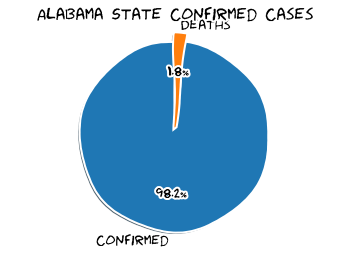

Alabama State Total Population
4887871
Alabama State Confirmed
83782 (1.7140796064380588% of population)
Alabama State Deaths
1538 (1.8357165023513404% of confirmed)



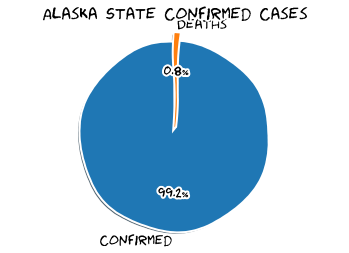

Alaska State Total Population
737438
Alaska State Confirmed
2798 (0.37942172765710475% of population)
Alaska State Deaths
22 (0.7862759113652609% of confirmed)



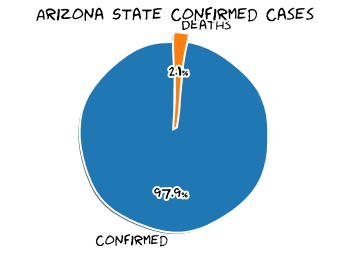

Arizona State Total Population
7171646
Arizona State Confirmed
168273 (2.346365116181139% of population)
Arizona State Deaths
3454 (2.0526168785247783% of confirmed)



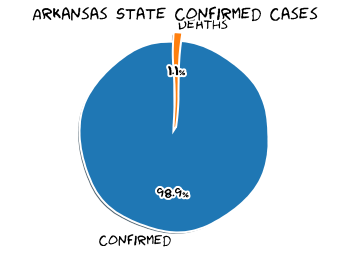

Arkansas State Total Population
3013825
Arkansas State Confirmed
40968 (1.359335727854139% of population)
Arkansas State Deaths
434 (1.0593634055848467% of confirmed)



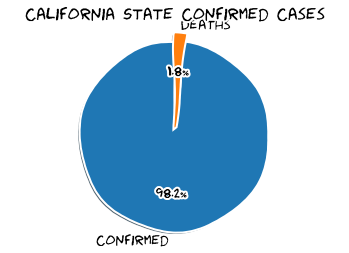

California State Total Population
39557045
California State Confirmed
475806 (1.2028350449332097% of population)
California State Deaths
8748 (1.8385644569425355% of confirmed)



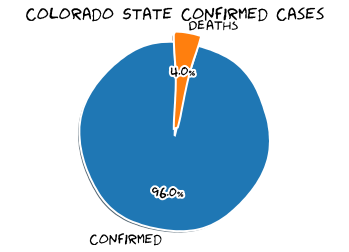

Colorado State Total Population
5695564
Colorado State Confirmed
45296 (0.7952855941922521% of population)
Colorado State Deaths
1807 (3.9893147297774636% of confirmed)



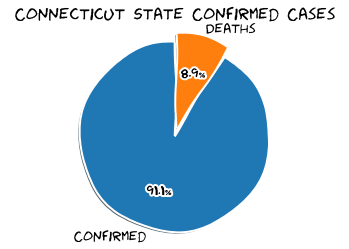

Connecticut State Total Population
3572665
Connecticut State Confirmed
49540 (1.3866399452509541% of population)
Connecticut State Deaths
4425 (8.932176019378279% of confirmed)



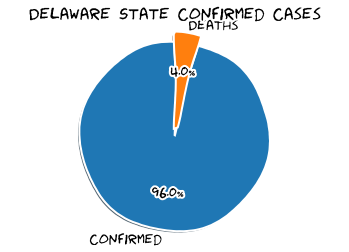

Delaware State Total Population
967171
Delaware State Confirmed
14602 (1.5097640437937034% of population)
Delaware State Deaths
581 (3.978906999041227% of confirmed)



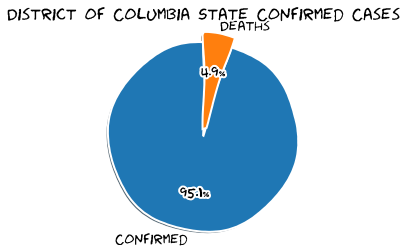

District of Columbia State Total Population
702455
District of Columbia State Confirmed
11999 (1.7081521236235773% of population)
District of Columbia State Deaths
584 (4.867072256021335% of confirmed)



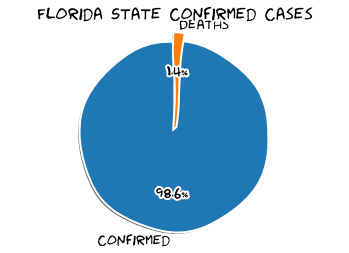

Florida State Total Population
21299325
Florida State Confirmed
451423 (2.119423972355931% of population)
Florida State Deaths
6333 (1.4028970610713234% of confirmed)



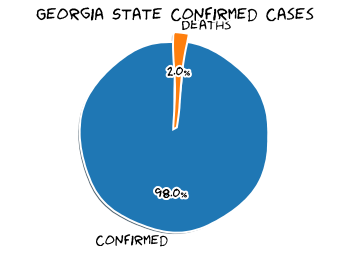

Georgia State Total Population
10519475
Georgia State Confirmed
175052 (1.6640754410272376% of population)
Georgia State Deaths
3563 (2.0353951968557915% of confirmed)



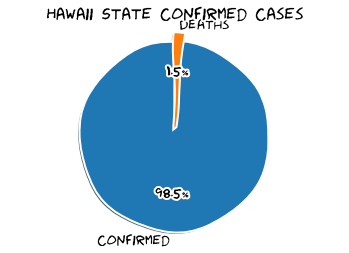

Hawaii State Total Population
1420491
Hawaii State Confirmed
1757 (0.12368962562944784% of population)
Hawaii State Deaths
26 (1.479795105293113% of confirmed)



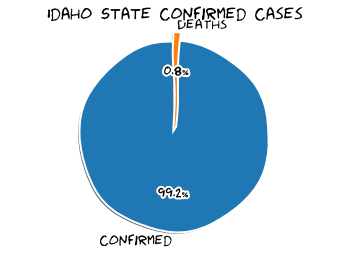

Idaho State Total Population
1754208
Idaho State Confirmed
19220 (1.0956511428519309% of population)
Idaho State Deaths
160 (0.8324661810613945% of confirmed)



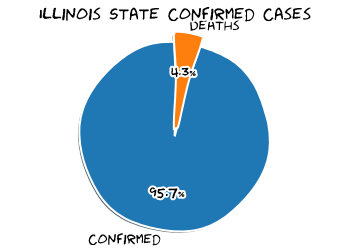

Illinois State Total Population
12741080
Illinois State Confirmed
176363 (1.3842076181924923% of population)
Illinois State Deaths
7654 (4.339912566694829% of confirmed)



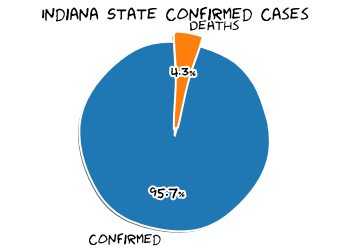

Indiana State Total Population
6691878
Indiana State Confirmed
64299 (0.9608513484555458% of population)
Indiana State Deaths
2733 (4.250454905986096% of confirmed)



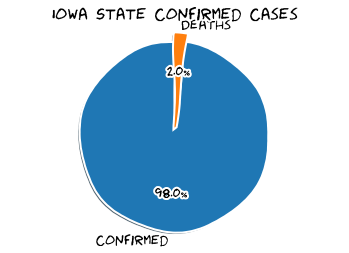

Iowa State Total Population
3156145
Iowa State Confirmed
43282 (1.3713565124542757% of population)
Iowa State Deaths
845 (1.9523127397070374% of confirmed)



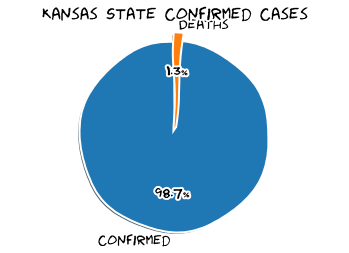

Kansas State Total Population
2911510
Kansas State Confirmed
26262 (0.9020061754896943% of population)
Kansas State Deaths
340 (1.294646256949204% of confirmed)



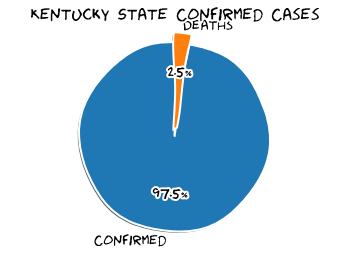

Kentucky State Total Population
4468402
Kentucky State Confirmed
28730 (0.6429591607917103% of population)
Kentucky State Deaths
723 (2.516533240515141% of confirmed)



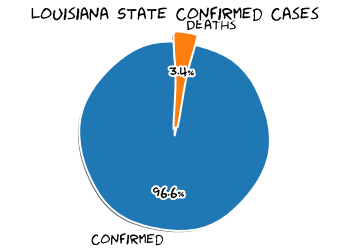

Louisiana State Total Population
4659978
Louisiana State Confirmed
112773 (2.420032884275419% of population)
Louisiana State Deaths
3881 (3.4414265826039925% of confirmed)



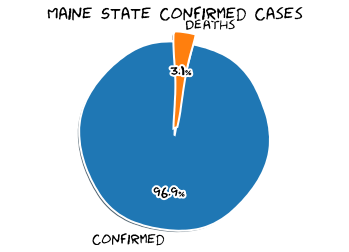

Maine State Total Population
1338404
Maine State Confirmed
3866 (0.28885149775404134% of population)
Maine State Deaths
121 (3.1298499741334718% of confirmed)



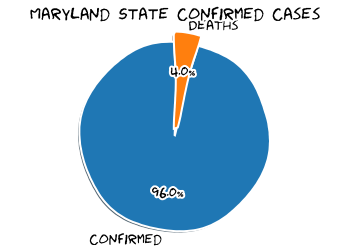

Maryland State Total Population
6042718
Maryland State Confirmed
86285 (1.427917039981015% of population)
Maryland State Deaths
3452 (4.0006953699947845% of confirmed)



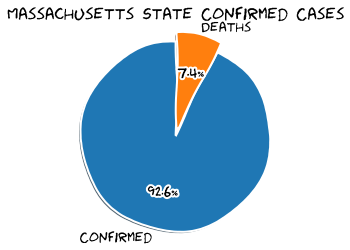

Massachusetts State Total Population
6902149
Massachusetts State Confirmed
116182 (1.683272847340734% of population)
Massachusetts State Deaths
8551 (7.360004131448934% of confirmed)



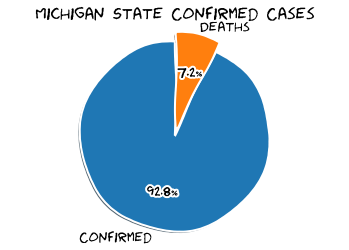

Michigan State Total Population
9995915
Michigan State Confirmed
88974 (0.8901036073235916% of population)
Michigan State Deaths
6422 (7.217838919234833% of confirmed)



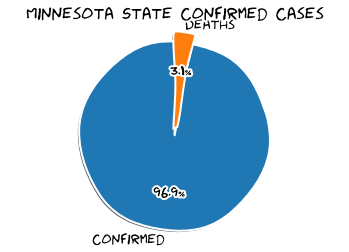

Minnesota State Total Population
5611179
Minnesota State Confirmed
52947 (0.9435984843826939% of population)
Minnesota State Deaths
1629 (3.076661567227605% of confirmed)



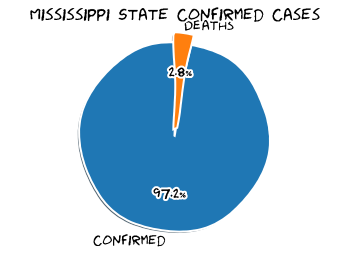

Mississippi State Total Population
2986530
Mississippi State Confirmed
55502 (1.858410931750225% of population)
Mississippi State Deaths
1559 (2.808907787106771% of confirmed)



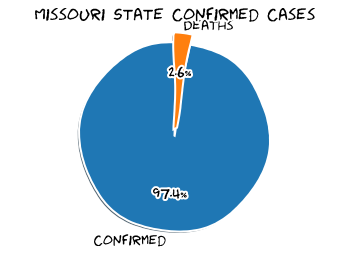

Missouri State Total Population
6126452
Missouri State Confirmed
46831 (0.7644065439507238% of population)
Missouri State Deaths
1239 (2.6456834148320554% of confirmed)



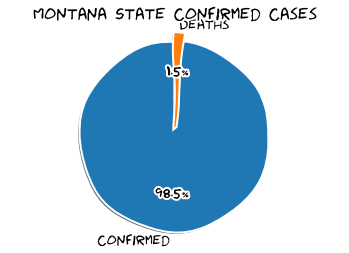

Montana State Total Population
1062305
Montana State Confirmed
3676 (0.3460399791020469% of population)
Montana State Deaths
54 (1.4689880304679% of confirmed)



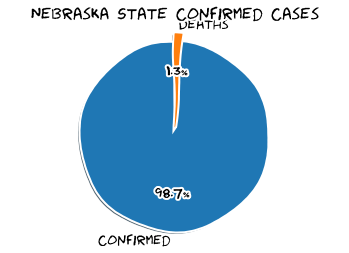

Nebraska State Total Population
1929268
Nebraska State Confirmed
25157 (1.3039660638128037% of population)
Nebraska State Deaths
321 (1.2759868028779267% of confirmed)



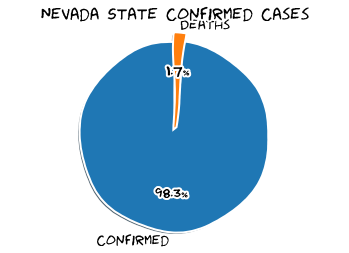

Nevada State Total Population
3034392
Nevada State Confirmed
45806 (1.5095610586898462% of population)
Nevada State Deaths
780 (1.7028336899096188% of confirmed)



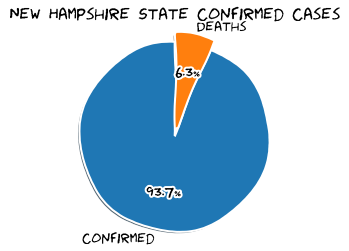

New Hampshire State Total Population
1356458
New Hampshire State Confirmed
6500 (0.4791891824147891% of population)
New Hampshire State Deaths
409 (6.292307692307693% of confirmed)



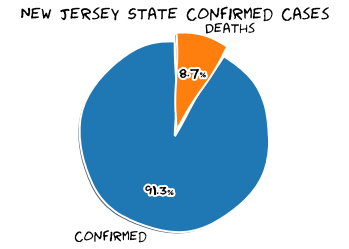

New Jersey State Total Population
8908520
New Jersey State Confirmed
180600 (2.0272727680916693% of population)
New Jersey State Deaths
15798 (8.74750830564784% of confirmed)



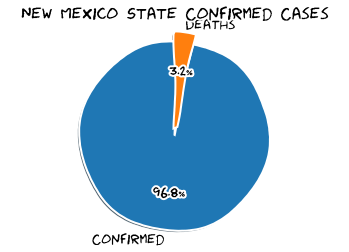

New Mexico State Total Population
2095428
New Mexico State Confirmed
19791 (0.9444848498731524% of population)
New Mexico State Deaths
626 (3.1630539133949775% of confirmed)



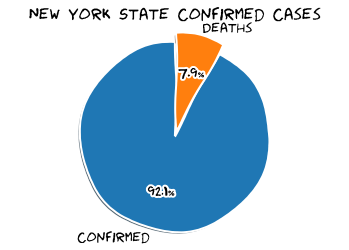

New York State Total Population
19542209
New York State Confirmed
413593 (2.116408641418173% of population)
New York State Deaths
32658 (7.896168455462253% of confirmed)



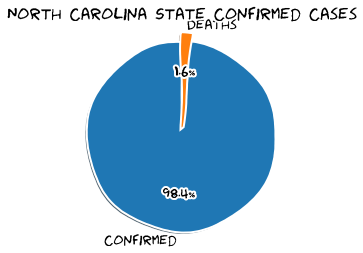

North Carolina State Total Population
10383620
North Carolina State Confirmed
118387 (1.14013224675017% of population)
North Carolina State Deaths
1888 (1.5947696959970268% of confirmed)



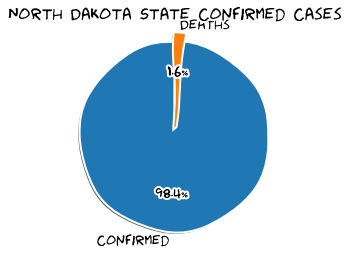

North Dakota State Total Population
760077
North Dakota State Confirmed
6227 (0.819259101380518% of population)
North Dakota State Deaths
102 (1.638027942829613% of confirmed)



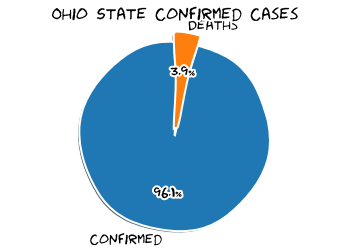

Ohio State Total Population
11689442
Ohio State Confirmed
87893 (0.7519007323018498% of population)
Ohio State Deaths
3422 (3.8933703480368176% of confirmed)



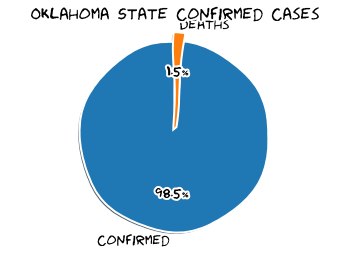

Oklahoma State Total Population
3943079
Oklahoma State Confirmed
34623 (0.8780701578639434% of population)
Oklahoma State Deaths
523 (1.5105565664442713% of confirmed)



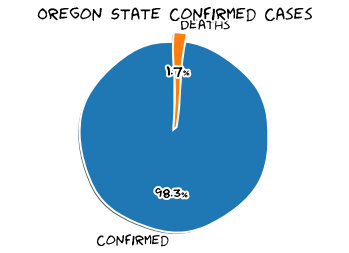

Oregon State Total Population
4190713
Oregon State Confirmed
17717 (0.42276815424964675% of population)
Oregon State Deaths
310 (1.7497318959191737% of confirmed)



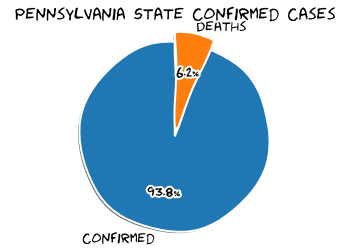

Pennsylvania State Total Population
12807060
Pennsylvania State Confirmed
114939 (0.8974659289485644% of population)
Pennsylvania State Deaths
7171 (6.238961536119159% of confirmed)



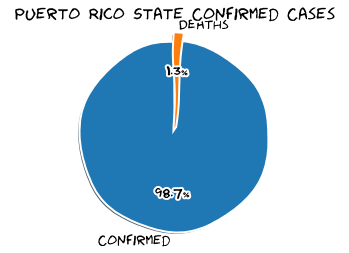

Puerto Rico State Total Population
3195153
Puerto Rico State Confirmed
16061 (0.5026676343824537% of population)
Puerto Rico State Deaths
211 (1.3137413610609552% of confirmed)



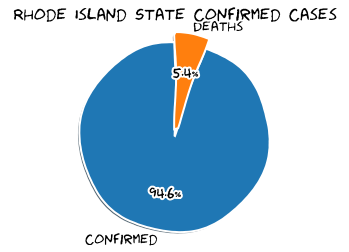

Rhode Island State Total Population
1057315
Rhode Island State Confirmed
18800 (1.7780888382364763% of population)
Rhode Island State Deaths
1007 (5.3563829787234045% of confirmed)



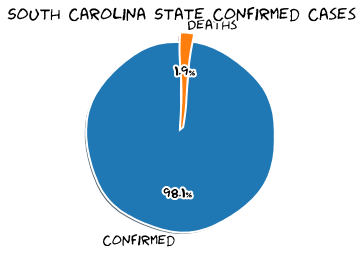

South Carolina State Total Population
5084127
South Carolina State Confirmed
85846 (1.6885101414657817% of population)
South Carolina State Deaths
1615 (1.8812757728956502% of confirmed)



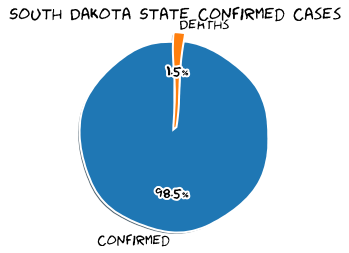

South Dakota State Total Population
882235
South Dakota State Confirmed
8614 (0.9763838433070554% of population)
South Dakota State Deaths
127 (1.4743440910146275% of confirmed)



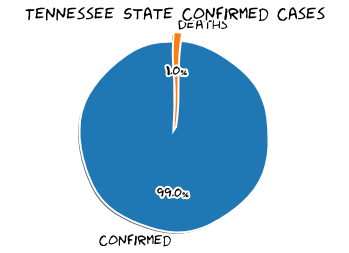

Tennessee State Total Population
6770010
Tennessee State Confirmed
101264 (1.495773270645095% of population)
Tennessee State Deaths
1040 (1.027018486332754% of confirmed)



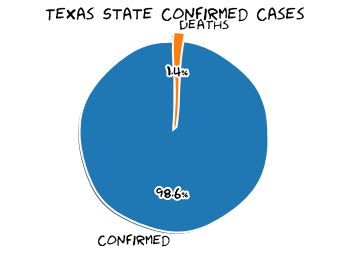

Texas State Total Population
28701845
Texas State Confirmed
410055 (1.428671223052037% of population)
Texas State Deaths
5832 (1.4222482349928667% of confirmed)



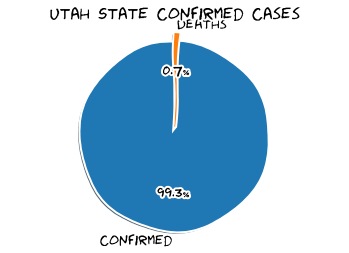

Utah State Total Population
3161105
Utah State Confirmed
39194 (1.239882889053037% of population)
Utah State Deaths
292 (0.7450119916313722% of confirmed)



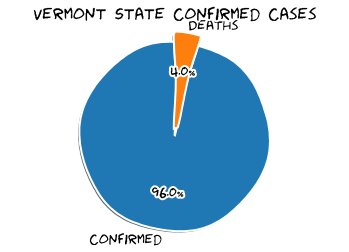

Vermont State Total Population
626299
Vermont State Confirmed
1406 (0.22449341289064806% of population)
Vermont State Deaths
56 (3.982930298719772% of confirmed)



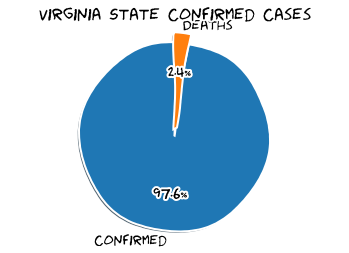

Virginia State Total Population
8517685
Virginia State Confirmed
87993 (1.0330623872566314% of population)
Virginia State Deaths
2125 (2.4149648267475823% of confirmed)



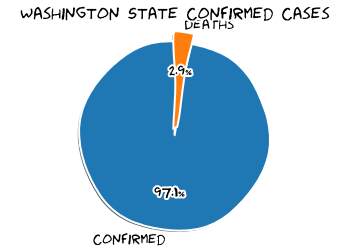

Washington State Total Population
7535591
Washington State Confirmed
54205 (0.7193198250807402% of population)
Washington State Deaths
1548 (2.8558251083848356% of confirmed)



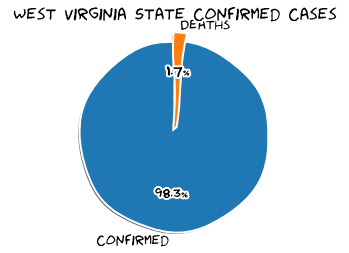

West Virginia State Total Population
1805832
West Virginia State Confirmed
6277 (0.34759601114610883% of population)
West Virginia State Deaths
109 (1.7364983272263819% of confirmed)



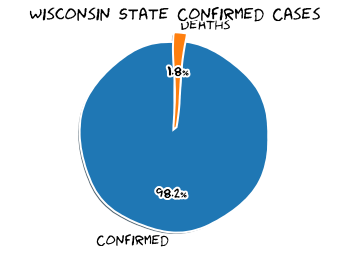

Wisconsin State Total Population
5813568
Wisconsin State Confirmed
51049 (0.8781010216101368% of population)
Wisconsin State Deaths
911 (1.7845599326137631% of confirmed)



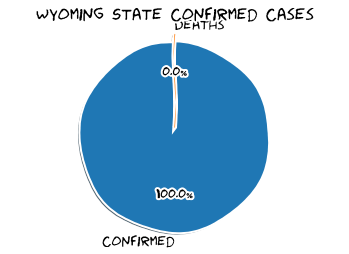

Wyoming State Total Population
577737
Wyoming State Confirmed
2186 (0.3783728582382641% of population)
Wyoming State Deaths
1 (0.04574565416285453% of confirmed)



In [10]:
for i in states:
    state_details(i)

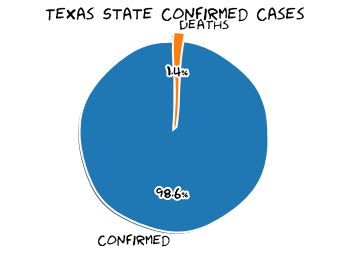

Texas State Total Population
28701845
Texas State Confirmed
410055 (1.428671223052037% of population)
Texas State Deaths
5832 (1.4222482349928667% of confirmed)



In [11]:
state_details('Texas')

In [12]:
# quick summary
print('US Confirmed')
print(us['confirmed'].sum())
print('US Deaths')
print(us['deaths'].sum())
print('')

ny = us.loc[us['provinceState'] == 'New York']
nyc = ny.loc[ny['admin2'] == 'New York City']
print('New York City Confirmed')
print(nyc['confirmed'].sum())
print('New York City Deaths')
print(nyc['deaths'].sum())
print('')

# create a dataframe of all comfirmed cases
global_confirmed = pd.DataFrame.from_dict(confirmed.json())

ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
print('Philippines Confirmed')
print(ph['confirmed'].sum())
print('Philippines Deaths')
print(ph['deaths'].sum())
print('')

US Confirmed
4401599
US Deaths
149778

New York City Confirmed
224551
New York City Deaths
23512

Philippines Confirmed
85486
Philippines Deaths
1962



In [13]:
# show api endpoints
api.json()

{'confirmed': {'detail': 'https://covid19.mathdro.id/api/confirmed',
  'value': 16849365},
 'countries': 'https://covid19.mathdro.id/api/countries',
 'countryDetail': {'example': 'https://covid19.mathdro.id/api/countries/USA',
  'pattern': 'https://covid19.mathdro.id/api/countries/[country]'},
 'dailySummary': 'https://covid19.mathdro.id/api/daily',
 'dailyTimeSeries': {'example': 'https://covid19.mathdro.id/api/daily/2-14-2020',
  'pattern': 'https://covid19.mathdro.id/api/daily/[dateString]'},
 'deaths': {'detail': 'https://covid19.mathdro.id/api/deaths',
  'value': 662648},
 'image': 'https://covid19.mathdro.id/api/og',
 'lastUpdate': '2020-07-29T21:38:33.000Z',
 'recovered': {'detail': 'https://covid19.mathdro.id/api/recovered',
  'value': 9760015},
 'source': 'https://github.com/mathdroid/covid19'}

In [14]:
# get date
yesterday = today - timedelta(days=1)
date = yesterday.strftime('%m-%d-%Y').lstrip('0').replace(' 0', '')

In [15]:
# Get yesterday's data
r = request.get('https://covid19.mathdro.id/api/daily/{}'.format(date))
print(r)
j = r.json()
df = pd.DataFrame.from_dict(j)
df

<Response [200]>


,fips,admin2,provinceState,countryRegion,lastUpdate,lat,long,confirmed,deaths,recovered,active,combinedKey,incidenceRate,case-fatalityRatio
0,45001,Abbeville,South Carolina,US,2020-07-29 04:35:11,34.22333378,-82.46170658,269,6,0,263,"Abbeville, South Carolina, US",1096.7505198352837,2.2304832713754648
1,22001,Acadia,Louisiana,US,2020-07-29 04:35:11,30.295064899999996,-92.41419698,2229,65,0,2164,"Acadia, Louisiana, US",3592.5537916028693,2.9161058770749215
2,51001,Accomack,Virginia,US,2020-07-29 04:35:11,37.76707161,-75.63234615,1069,15,0,1054,"Accomack, Virginia, US",3307.958905805174,1.4031805425631432
3,16001,Ada,Idaho,US,2020-07-29 04:35:11,43.4526575,-116.24155159999998,7378,50,0,7328,"Ada, Idaho, US",1532.0180984951835,0.6776904310111141
4,19001,Adair,Iowa,US,2020-07-29 04:35:11,41.33075609,-94.47105874,20,0,0,20,"Adair, Iowa, US",279.6420581655481,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3927,,,Unknown,Colombia,2020-07-17 22:34:48,,,0,0,0,0,"Unknown, Colombia",,
3928,2070,Dillingham,Alaska,US,2020-07-17 18:35:12,59.79603738,-158.23819419999995,1,0,0,1,"Dillingham, Alaska, US",20.34174125305126,0.0
3929,,,Grand Princess,Canada,2020-07-13 12:34:33,,,13,0,13,0,"Grand Princess, Canada",,0.0
3930,16061,Lewis,Idaho,US,2020-07-10 02:34:22,46.23315327,-116.434146,1,0,0,1,"Lewis, Idaho, US",26.055237102657642,0.0


In [16]:
# get all US confirmed cases
us = pd.DataFrame.from_dict(us_confirmed.json())
us

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1596058713000,40.767273,-73.971526,224551,0,23512,201039,New York City,36061,"New York City, New York, US",2693.486015,None,None,84036061,USA
1,California,US,1596058713000,34.308284,-118.228241,178663,0,4427,174236,Los Angeles,06037,"Los Angeles, California, US",1779.670244,None,None,84006037,USA
2,Arizona,US,1596058713000,33.348359,-112.491815,113148,0,1915,111233,Maricopa,04013,"Maricopa, Arizona, US",2522.576511,None,None,84004013,USA
3,Florida,US,1596058713000,25.611236,-80.551706,113143,0,1455,111688,Miami-Dade,12086,"Miami-Dade, Florida, US",4164.354016,None,None,84012086,USA
4,Illinois,US,1596058713000,41.841448,-87.816588,104001,0,4864,99137,Cook,17031,"Cook, Illinois, US",2019.345533,None,None,84017031,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3201,Maine,US,1596058713000,NaN,NaN,1,0,0,1,Unassigned,90023,"Unassigned, Maine, US",NaN,None,None,84090023,USA
3202,Nebraska,US,1596058713000,41.914827,-98.527989,1,0,0,1,Wheeler,31183,"Wheeler, Nebraska, US",127.713921,None,None,84031183,USA
3203,Montana,US,1596058713000,46.959252,-104.251093,1,0,0,1,Wibaux,30109,"Wibaux, Montana, US",103.199174,None,None,84030109,USA
3204,Alaska,US,1595010912000,59.796037,-158.238194,1,0,0,1,Dillingham,02070,"Dillingham, Alaska, US",20.341741,None,None,84002070,USA


In [17]:
# return only New York state
ny = us.loc[us['provinceState'] == 'New York']
ny

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1596058713000,40.767273,-73.971526,224551,0,23512,201039,New York City,36061,"New York City, New York, US",2693.486015,None,None,84036061,USA
8,New York,US,1596058713000,40.740665,-73.589419,43100,0,2194,40906,Nassau,36059,"Nassau, New York, US",3176.301694,None,None,84036059,USA
9,New York,US,1596058713000,40.883201,-72.801217,43084,0,1996,41088,Suffolk,36103,"Suffolk, New York, US",2917.782123,None,None,84036103,USA
13,New York,US,1596058713000,41.162784,-73.757417,35874,0,1443,34431,Westchester,36119,"Westchester, New York, US",3707.883982,None,None,84036119,USA
58,New York,US,1596058713000,41.150279,-74.025605,13852,0,673,13179,Rockland,36087,"Rockland, New York, US",4251.831707,None,None,84036087,USA
74,New York,US,1596058713000,41.403375,-74.302408,11034,0,489,10545,Orange,36071,"Orange, New York, US",2866.420741,None,None,84036071,USA
106,New York,US,1596058713000,42.762490,-78.730637,8410,0,663,7747,Erie,36029,"Erie, New York, US",915.421976,None,None,84036029,USA
181,New York,US,1596058713000,43.146389,-77.693229,4656,0,277,4379,Monroe,36055,"Monroe, New York, US",627.687828,None,None,84036055,USA
188,New York,US,1596058713000,41.764861,-73.743567,4453,0,153,4300,Dutchess,36027,"Dutchess, New York, US",1513.503593,None,None,84036027,USA
234,New York,US,1596058713000,43.004919,-76.199712,3437,0,194,3243,Onondaga,36067,"Onondaga, New York, US",746.317271,None,None,84036067,USA


In [18]:
ny_total_confirmed = ny['confirmed'].sum()
ny_total_confirmed

413593

In [19]:
# return only New York City
nyc = ny.loc[ny['admin2'] == 'New York City']
nyc

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1596058713000,40.767273,-73.971526,224551,0,23512,201039,New York City,36061,"New York City, New York, US",2693.486015,None,None,84036061,USA


In [20]:
# show all Philippines confirmed
# ph = pd.DataFrame.from_dict(ph_confirmed.json())
ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
ph


,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3,iso2
40,None,Philippines,1596058713000,12.879721,121.774017,85486,26996,1962,56528,None,None,Philippines,78.011639,None,None,608,PHL,PH


In [21]:
pop
pop.loc[pop['State'] == 'Texas']

,ID State,State,ID Year,Year,Population,Slug State
43,04000US48,Texas,2018,2018,28701845,texas
